In [2]:
# # Universal CWD hack (copy this cell to the top of any notebook)
# import os, sys, subprocess
# from pathlib import Path

# def _ensure_ipynbname_and_get_path():
#     try:
#         import ipynbname
#     except Exception:
#         try:
#             subprocess.check_call([sys.executable, "-m", "pip", "install", "ipynbname", "--quiet"])
#             import ipynbname  # retry
#         except Exception:
#             return None
#     try:
#         return ipynbname.path()  # pathlib.Path
#     except Exception:
#         return None

# def _prompt_for_dir():
#     try:
#         p = input("Enter absolute path to this notebook's folder (or leave blank to skip): ").strip()
#         if p and os.path.isdir(p):
#             return p
#     except Exception:
#         pass
#     return None

# def _set_cwd_to_notebook_dir():
#     nb_path = _ensure_ipynbname_and_get_path()
#     if nb_path is not None:
#         try:
#             os.chdir(str(nb_path.parent))
#             print("CWD set via ipynbname:", os.getcwd())
#             return
#         except Exception:
#             pass
#     # VS Code fallback
#     try:
#         if '__vsc_ipynb_file__' in globals():
#             nb_dir = os.path.dirname(__vsc_ipynb_file__)
#             if nb_dir and os.path.isdir(nb_dir):
#                 os.chdir(nb_dir)
#                 print("CWD set via __vsc_ipynb_file__:", os.getcwd())
#                 return
#     except Exception:
#         pass
#     # Environment variable override (set once per machine/session if you prefer)
#     env_dir = os.environ.get("NOTEBOOK_DIR") or os.environ.get("NB_DIR")
#     if env_dir and os.path.isdir(env_dir):
#         os.chdir(env_dir)
#         print("CWD set via env NOTEBOOK_DIR:", os.getcwd())
#         return
#     # Interactive prompt as last resort
#     prompt_dir = _prompt_for_dir()
#     if prompt_dir:
#         os.chdir(prompt_dir)
#         print("CWD set via prompt:", os.getcwd())
#         return
#     print("CWD unchanged (no notebook path available):", os.getcwd())

# _set_cwd_to_notebook_dir()

In [ ]:
# # Check if kernel is local or remote
import os, sys, socket, platform

def kernel_location_summary(known_local_hosts=None):
    # Optionally list your local machine names to improve accuracy
    known_local_hosts = set(known_local_hosts or [])

    hostname = socket.gethostname()
    fqdn = socket.getfqdn()
    ip = None
    try:
        ip = socket.gethostbyname(hostname)
    except Exception:
        pass

    env = os.environ
    hints = {
        "hostname": hostname,
        "fqdn": fqdn,
        "ip": ip,
        "python_executable": sys.executable,
        "cwd": os.getcwd(),
        "ssh_env": any(k in env for k in ("SSH_CONNECTION","SSH_CLIENT","SSH_TTY")),
        "jupyterhub_env": any(k.startswith("JUPYTERHUB_") for k in env),
        "in_container": os.path.exists("/.dockerenv"),
        "in_wsl": "WSL_DISTRO_NAME" in env,
    }

    # Decision logic: conservative “remote” if strong signals present
    reasons = []
    is_remote = False
    if hints["ssh_env"]:
        is_remote = True; reasons.append("SSH environment variables present")
    if hints["jupyterhub_env"]:
        is_remote = True; reasons.append("JupyterHub environment detected")
    if hostname not in known_local_hosts and known_local_hosts:
        is_remote = True; reasons.append(f"Hostname '{hostname}' not in known local list")

    print("Kernel Hostname:", hostname)
    print("Kernel IP:", ip)
    print("SSH env:", hints["ssh_env"], "| JupyterHub env:", hints["jupyterhub_env"])
    print("Container:", hints["in_container"], "| WSL:", hints["in_wsl"])
    print("Python:", hints["python_executable"])
    print("CWD:", hints["cwd"])

    verdict = "REMOTE" if is_remote else "LOCAL (or unknown)"
    if reasons:
        print("Verdict:", verdict, "| Reasons:", ", ".join(reasons))
    else:
        print("Verdict:", verdict)
    return hints

# Optional: add your local machine names to improve accuracy
kernel_location_summary(known_local_hosts={"rowe-desktop","rowe-laptop"})

Kernel Hostname: woodlands
Kernel IP: 10.20.1.6
SSH env: True | JupyterHub env: False
Container: False | WSL: False
Python: /home/rowe/python/Kepler_TTV/.venv/bin/python
CWD: /home/rowe/python/Kepler_TTV
Verdict: REMOTE | Reasons: SSH environment variables present, Hostname 'woodlands' not in known local list


{'hostname': 'woodlands',
 'fqdn': 'woodlands',
 'ip': '10.20.1.6',
 'python_executable': '/home/rowe/python/Kepler_TTV/.venv/bin/python',
 'cwd': '/home/rowe/python/Kepler_TTV',
 'ssh_env': True,
 'jupyterhub_env': False,
 'in_container': False,
 'in_wsl': False}

## Kepler TTV WorkBook

### VS Code Virtual Environment Setup
If you are using VS Code, it is recommended to create a virtual environment for this project. Here are the steps to create a virtual environment in VS Code:

- Open the Command Palette: Press Ctrl+Shift+P (or Cmd+Shift+P on Mac).
- Search: Type Python: Create Environment and select it.
- Choose Type: Select Venv.
- Select Interpreter: Choose the base Python version you have installed (e.g., Python 3.10, 3.11).
- Wait: VS Code will create a .venv folder in your project and automatically select it as your environment.

It is recommended to install this package in "editable" mode inside a virtual environment. This allows you to modify the source code without needing to reinstall.

```bash
git clone https://github.com/jasonfrowe/bls_cuda.git
cd bls_cuda
```

Install via pip:
```bash
pip install -e .
```

### Alternative Virtual Environment Setup
If you are not using VS Code, you can still create a virtual environment using the command line:

You may find it useful to create a virtual environment for this workbook (optional)

```bash
python -m venv bls_env         # Install create virtual environment that we will name 'bls_env'
source ./bls_env/bin/activate   # Active the new environment
pip install ipykernel           # Install iPython kernel
python -m ipykernel install --user --name=bls_env  # Add Kernel to Jupyter
(now make sure you have selected `bls_env` as your active Kernel for this notebook)
```

It is recommended to install bls_cuda package in "editable" mode inside a virtual environment. This allows you to modify the source code without needing to reinstall.

```bash
git clone https://github.com/jasonfrowe/bls_cuda.git
cd bls_cuda
```

Install via pip:
```bash
pip install -e .
```
### Package requirements:
- pytfit5
- numpy
- matplotlib
- tqdm
- numba
- scipy
- astroquery
- pandas

```bash
pip install numpy matplotlib tqdm numba scipy astroquery pandas
```

It is also recommended to install ipywidgets for Jupyter notebooks
```bash
pip install ipywidgets
```

In [1]:
# Load the autoreload extension for development 
%load_ext autoreload
%autoreload 2

In [2]:
# import os, sys

import numpy as np

import pytfit5.bls_cpu as gbls     # BLS routines that run on the CPU
import pytfit5.transitPy5 as tpy5  # Transit processing modules 

import matplotlib.pyplot as plt  #MatPlotLib for some simple plots 

# for BLS routine
import pytfit5.transitPy5 as tpy5        # routines to handle transit photometry
import pytfit5.bls_cpu as gbls           # BLS CPU implementation 

# Transit modelling module
import pytfit5.transitmodel as transitm
import pytfit5.keplerian as kep
import pytfit5.transitfit as transitf
import pytfit5.transitplot as transitp

# Reading in CSV file 
import pandas as pd

In [3]:
cwd = os.getcwd()
print(cwd)

/home/rowe/python/Kepler_TTV


In [4]:
import Kepler_TTV as kttv

## Read in Kepler catalogue

In [5]:
# The URL of the CSV file (please do not abuse this link)
url = "https://kona.ubishops.ca/architecture/KeplerARCH_20231117.csv"

# Read the CSV file into a pandas DataFrame
Kepler_cat = pd.read_csv(url)

## Get data for a specific KOI

In [24]:
KOI = 1599  #The system we want 

# Get the data frame for the requested KOI
koi_df = tpy5.find_koi_rows(KOI, Kepler_cat) 

# Fetch data products and set up necessary classes.  Set raw = 1 to get raw PDC light-curves
phot, tpy5_inputs = tpy5.get_photometry(koi_df, raw = 0) 

# Get the best-fit transit model (this is different than the Arch Catalogue) 
sol = tpy5.populate_transit_model(Kepler_cat, KOI)

# Get transit-timing measurements.
ntt, tobs, omc, omc_err = tpy5.get_timing_data(Kepler_cat, KOI)

# Update flags to mark in-transit data (note: this routine does not yet account for TTVs)
kep.mark_intransit_data(phot, sol, tdurcut = 2.0)  # tdurcut is the amount of +/- time to protect centred on the transit 

Searching for KOI values starting with: 1599

Found 2 confirmed planets in system 1599.
Fetching model solution from: https://kona.ubishops.ca/Kepler_n/koi1599.n/n0.dat
 -> Success! Found 68 timing points.
 -> Success! Found 100 timing points.


## Quick plot of photometry

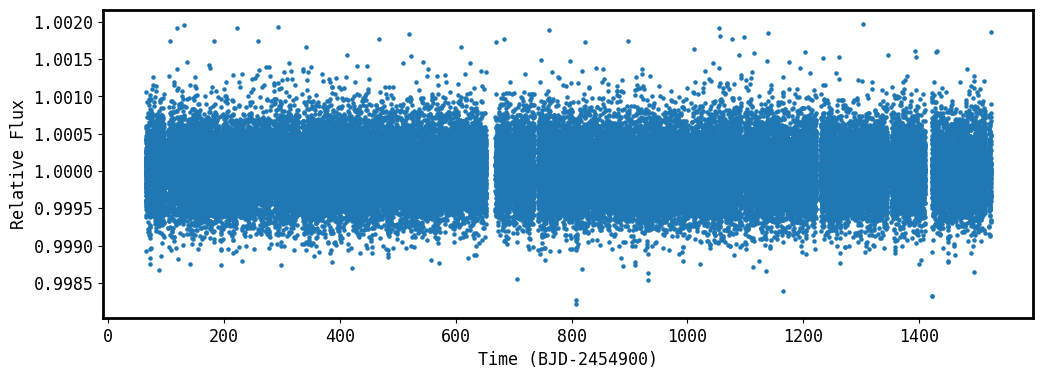

In [25]:
# Processed Light curve 
fig=plt.figure(figsize=(12, 4))
plt.rcParams.update({'font.size': 12})
plt.scatter(phot.time,phot.flux, s=5)
plt.xlabel('Time (BJD-2454900)')
plt.ylabel('Relative Flux')
plt.show()

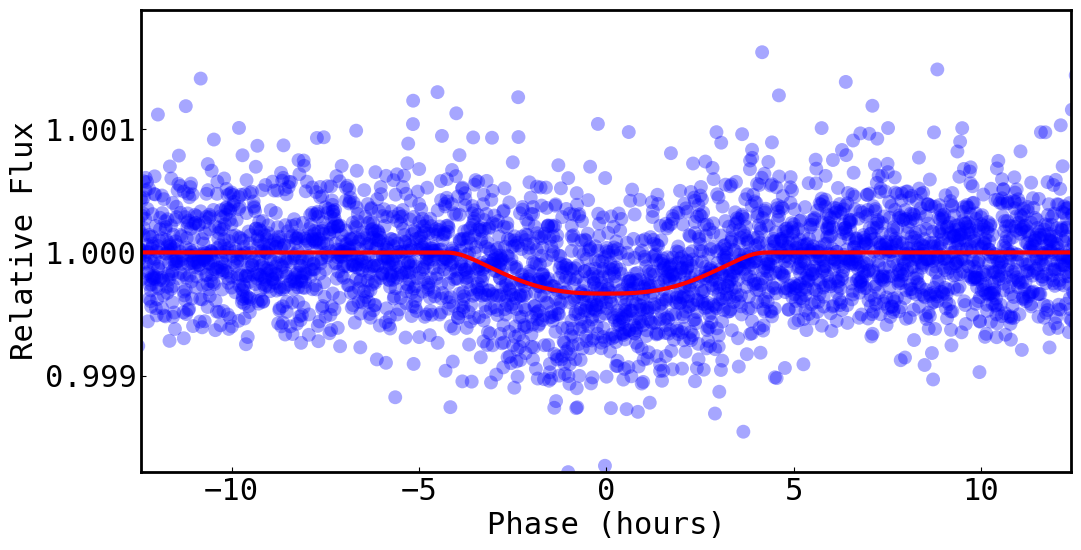

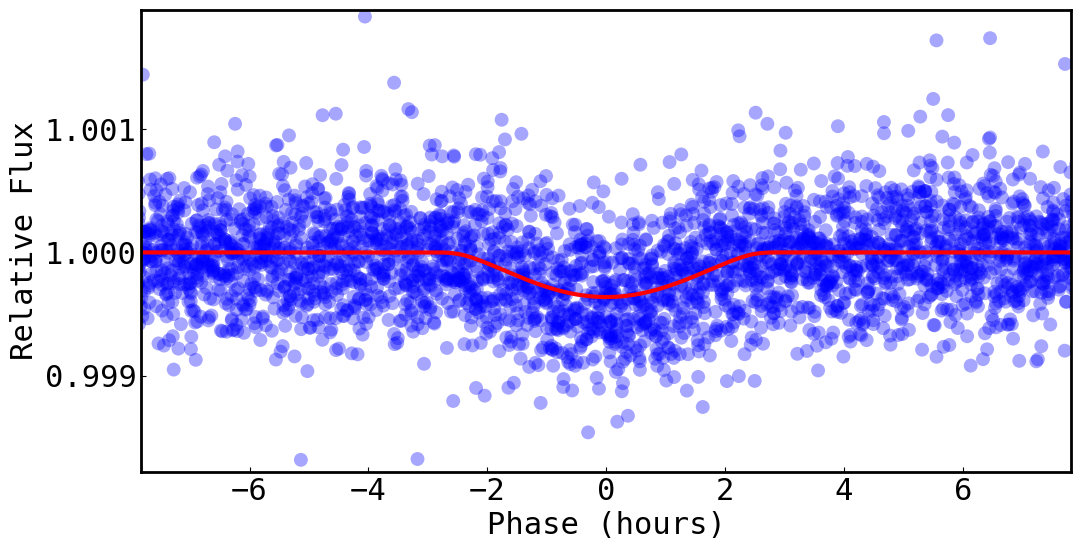

In [26]:
for pl_plot in range(sol.npl):
    transitp.plotTransit(phot, sol, pl_to_plot=pl_plot+1)

## Quick plot of TTVs

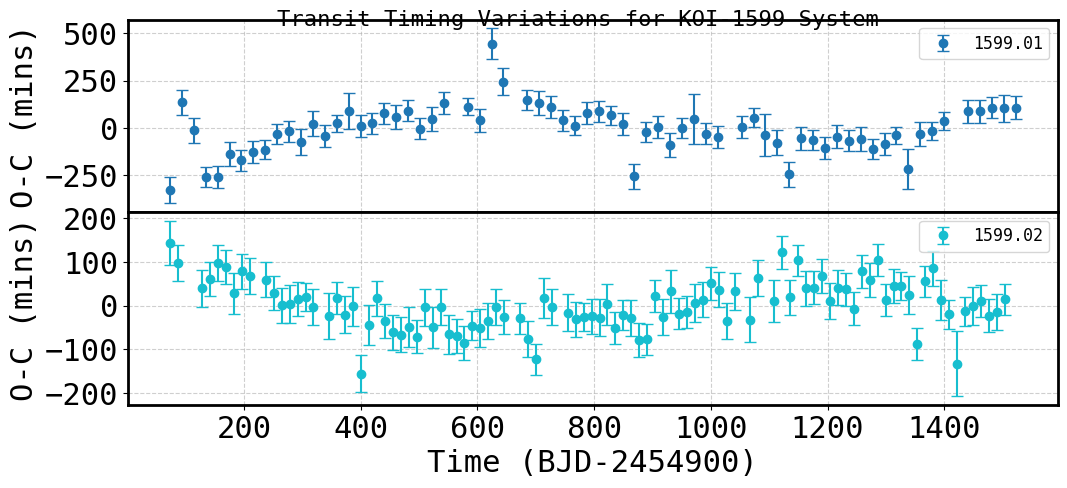

In [27]:
tpy5.plotTTVs(ntt, tobs, omc, omc_err, KOI, koi_df)

# Run data processing (only use if fetching raw data)

Data conditioning for the transit search includes:
- applying a data filter
- rejecting outliers

In [28]:
# # Run the detrending and outlier detection (if needed) 
# tpy5_inputs.boxbin = 2.0 # set detrending length
# tpy5_inputs.nfitp  = 3   # Set polynomial order
# tpy5.run_polyfilter(phot, tpy5_inputs)  # flux_f will contain the filtered photometry
# tpy5.run_cutoutliers(phot, tpy5_inputs) # data clipping, phot.icut will flag bad data

# # Processed Light curve 
# fig=plt.figure(figsize=(12, 4))
# plt.rcParams.update({'font.size': 12})
# plt.scatter(phot.time[phot.icut==0],phot.flux[phot.icut==0], s=5)
# plt.xlabel('Time (BJD-2454900)')
# plt.ylabel('Relative Flux')
# plt.show()

## Fit a new transit model

In [29]:
# Define the parameters to fit
params_to_fit = ["rho", "zpt", "t0", "per", "bb", "rdr"]

# Fit the data - phot.flux_f is used for the fit.
# We are including the TTVs with this model. 
sol_fit = transitf.fitTransitModel(sol, params_to_fit, phot, ntt=ntt, tobs=tobs, omc=omc)

In [30]:
# See the fitted parameters (Note the error is a simple co-variance matrix at this stage)
transitp.printParams(sol_fit)

ρ* (g/cm³):                     0.0145878 ± 0.0045776
c1:                                0.3942 ± 0.0
c2:                                 0.269 ± 0.0
q1:                                   0.0 ± 0.0
q2:                                   0.0 ± 0.0
Dilution:                             0.0 ± 0.0
Velocity Offset:                      0.0 ± 0.0
Photometric zero point:         1.199e-05 ± 3.798e-06

Planet #1:
t0 (days):                     73.1958071 ± 0.0057108
Period (days):                 20.4070999 ± 0.0001412
Impact parameter:               0.9760209 ± 0.0101659
Rp/R*:                          0.0268876 ± 0.0031905
sqrt(e)cos(w):                        0.0 ± 0.0
sqrt(e)sin(w):                        0.0 ± 0.0
RV Amplitude (m/s):                   0.0 ± 0.0
Thermal eclipse depth (ppm):          0.0 ± 0.0
Ellipsoidal variations (ppm):         0.0 ± 0.0
Albedo amplitude (ppm):               0.0 ± 0.0

Planet #2:
t0 (days):                     73.9326322 ± 0.0040609
Period (days):        

## Get the current transit model 

in this example we set ntt, tobs and omc to include the TTVs in the transit model

In [31]:
# Note, we are using the re-fitted model.  Change back to 'sol' to use the original.
tmodel = transitm.transitModel(sol_fit, phot.time, itime=phot.itime, ntt=ntt, tobs=tobs, omc=omc)

## Fourier Analysis

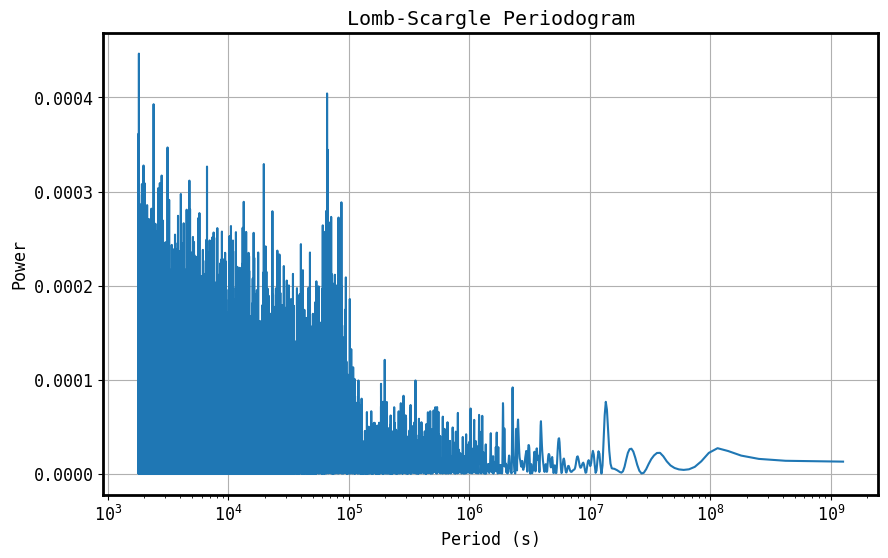

The most significant frequency is: 47.6306 c/d
Corresponding period: 0.0210 day


In [32]:
kttv.phot_lombscargle(phot, tmodel)

In [33]:
full_model, found = kttv.prewhiten(phot, tmodel, n_iterations=20, max_frequency=48)

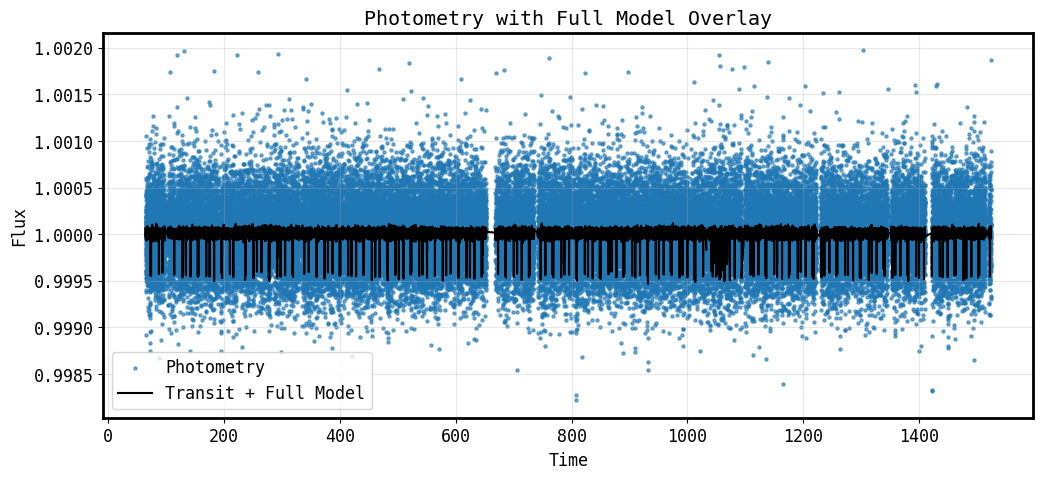

In [34]:
kttv.plot_full_model_overlay(phot, tmodel, full_model)

# Run BLS Search  
 - takes about 1-2 minutes to run depending on your computer (code will use all your CPU cores)
 - default is to search from 0.5 days to half the length of the data (~700 days).
 - Change freq2 to make BLS run faster if you don't care about very short periods)

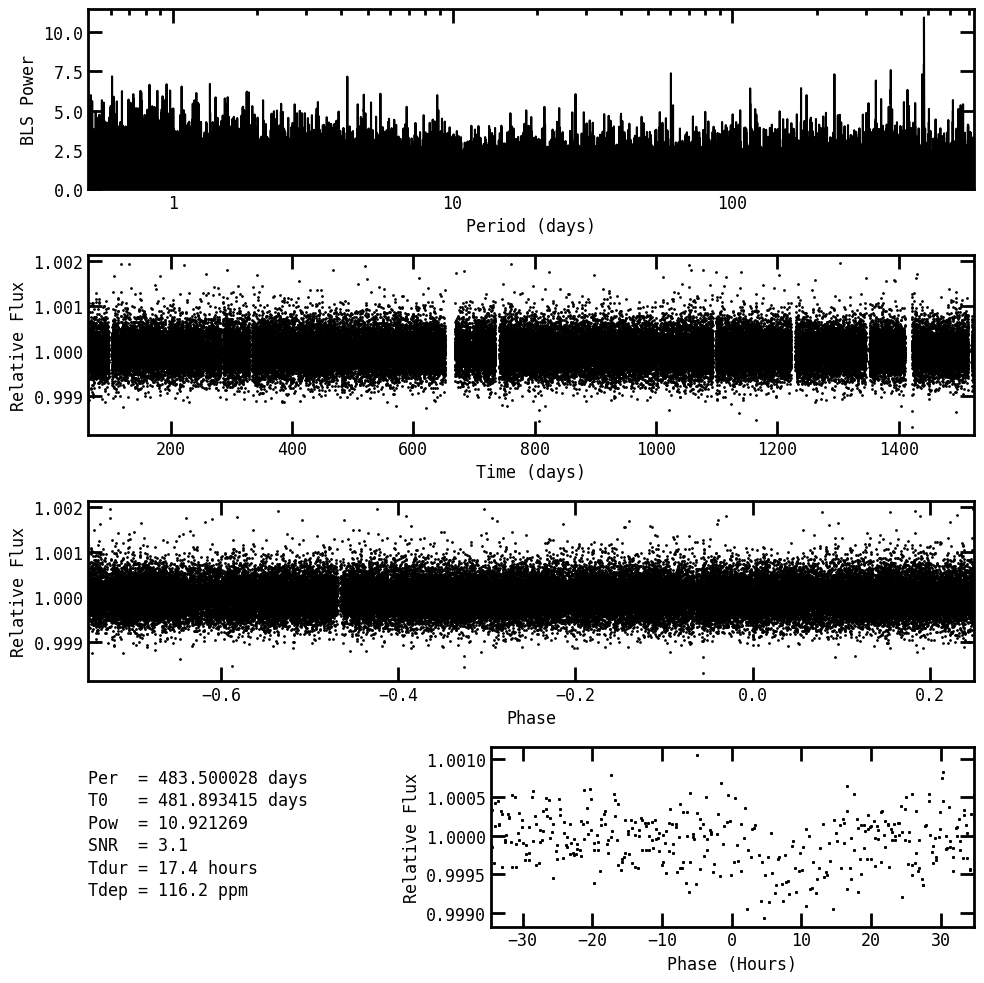

In [40]:
# Set up the BLS inputs and run
gbls_inputs          = gbls.gbls_inputs_class() # Initialize needed inputs
gbls_inputs.zerotime = 0.0
gbls_inputs.Rstar    = tpy5_inputs.mstar
gbls_inputs.Mstar    = tpy5_inputs.rstar
gbls_inputs.plots    = 1 # 1=X11, 2=both, 0=none
gbls_inputs.freq1    = 2/(np.max(phot.time) - np.min(phot.time))
gbls_inputs.freq2    = -1 # default value of 0.5 day period
gbls_inputs.filename = tpy5_inputs.photfile  # Used for naming the file, extension replaced with PNG.
gbls_inputs.normalize = "iterative_baseline"

# Run BLS, applying data cuts and removing the current best-fit model (so we are searching the residuals)
gbls_ans = gbls.bls(gbls_inputs, phot.time[(phot.icut == 0)], phot.flux_f[(phot.icut == 0)] - tmodel[(phot.icut == 0)] - full_model[(phot.icut == 0)])

## Measure TTVs  

We can remeasure the TTVs

In [36]:
pflag  = 0 # 1 = use the previous O-C measurements to initialize the next fit 
pstart = 0 # set the guess for the first O-C measurement 
# pflag  = [1, 1, 0] 
# pstart = [omc[0,0], omc[1,0], 0] # Example that uses the exisiting O-C measurements to initialize the model
phot.flux_f -= full_model
ntt_new, tobs_new, omc_new, omc_err_new = kttv.fit_ttvs(phot, sol_fit, ntt, tobs, omc, pflag = pflag, pstart = pstart)

  0%|          | 0/2 [00:00<?, ?it/s]

## Plot that compares the new and old TTVs

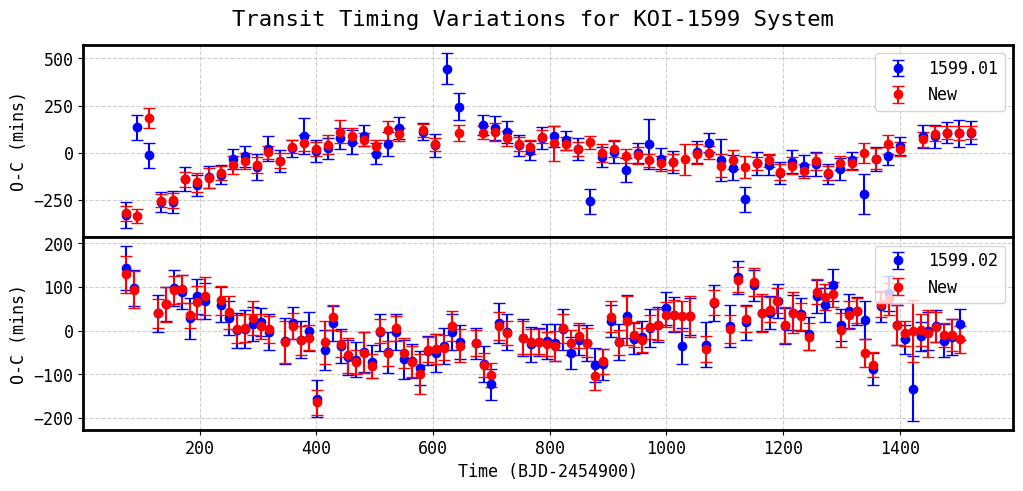

In [37]:
kttv.plot_ttv_comparison(ntt, tobs, omc, omc_err, ntt_new, tobs_new, omc_new, omc_err_new, koi_df, KOI)

## Things to add:

- visualize an individual transit fit for timing measurements
- flag overlapping transits
- function to export OMC values to .tt format
- ~~Fourier decomposition of the light-curve~~